# Model Training

In [1]:
# XGBoost & Random Forest Model Training with Absolute Path
import pandas as pd
import numpy as np
import xgboost as xgb
import joblib
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# ==============================
# 1. Load the processed dataset
# ==============================
data_path = r"C:\Users\haier\AI_Stock_Analyzer\Data\processed\all_stocks_features.csv"

if not os.path.exists(data_path):
    raise FileNotFoundError(f"Processed dataset not found at: {data_path}")

df = pd.read_csv(data_path, parse_dates=["Date"])
print("Data loaded successfully!")
print("Shape:", df.shape)
print(df.head())

# ==============================
# 2. Prepare features & target
# ==============================
target = "Close"
features = [col for col in df.columns if col not in ["Date", "Ticker", target]]

X = df[features]
y = df[target].values.ravel()  # ensure y is 1D

print("X shape:", X.shape)
print("y shape:", y.shape)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# ==============================
# 3. Train XGBoost Model
# ==============================
xgb_model = xgb.XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective="reg:squarederror"
)

print("\nTraining XGBoost model...")
xgb_model.fit(X_train, y_train)

# ==============================
# 4. Train Random Forest Model
# ==============================
rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="sqrt",   # corrected from "auto"
    random_state=42,
    n_jobs=-1
)

print("\nTraining Random Forest model...")
rf_model.fit(X_train, y_train)

# ==============================
# 5. Evaluate Models
# ==============================
def evaluate_model(model, X_test, y_test, name="Model"):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"\n{name} Evaluation:")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")
    return y_pred

y_pred_xgb = evaluate_model(xgb_model, X_test, y_test, "XGBoost")
y_pred_rf = evaluate_model(rf_model, X_test, y_test, "Random Forest")

# ==============================
# 6. Save Models
# ==============================
models_folder = r"C:\Users\haier\AI_Stock_Analyzer\models"
os.makedirs(models_folder, exist_ok=True)

xgb_model_path = os.path.join(models_folder, "generalized_xgb_model.pkl")
rf_model_path = os.path.join(models_folder, "generalized_rf_model.pkl")

joblib.dump(xgb_model, xgb_model_path)
joblib.dump(rf_model, rf_model_path)

print(f"\nXGBoost model saved at: {xgb_model_path}")
print(f"Random Forest model saved at: {rf_model_path}")


Data loaded successfully!
Shape: (9990, 22)
        Date       Open       High        Low      Close       Volume  \
0 2017-01-24  29.887501  30.025000  29.875000  29.992500   92844000.0   
1 2017-01-25  30.105000  30.525000  30.070000  30.469999  129510400.0   
2 2017-01-26  30.417500  30.610001  30.400000  30.485001  105350400.0   
3 2017-01-27  30.535000  30.587500  30.400000  30.487499   82251600.0   
4 2017-01-30  30.232500  30.407499  30.165001  30.407499  121510000.0   

       MA10  MA50  MA200      EMA10  ...  Volatility  Momentum        RSI  \
0  29.92425   NaN    NaN  29.863754  ...         NaN  0.245001  81.006434   
1  29.99350   NaN    NaN  29.973981  ...         NaN  0.692499  86.901756   
2  30.04825   NaN    NaN  30.066893  ...         NaN  0.547501  85.964907   
3  30.11575   NaN    NaN  30.143367  ...         NaN  0.674999  83.006507   
4  30.18050   NaN    NaN  30.191391  ...         NaN  0.647499  74.626857   

       MACD  MACD_signal       ATR  Close_lag1  Close_

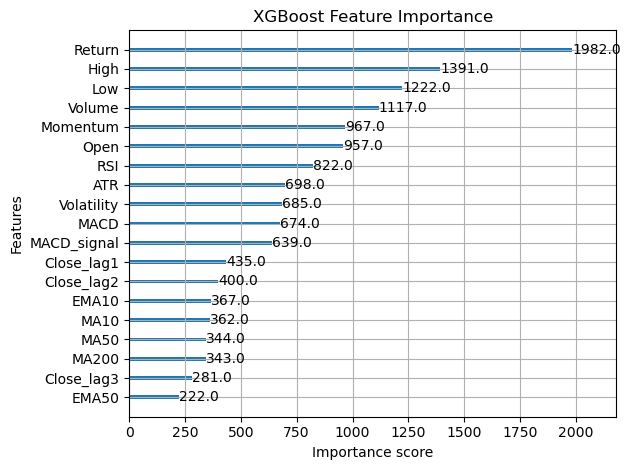

In [21]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Plot feature importance
xgb.plot_importance(model, importance_type="weight")
plt.title("XGBoost Feature Importance")
plt.tight_layout()
plt.show()


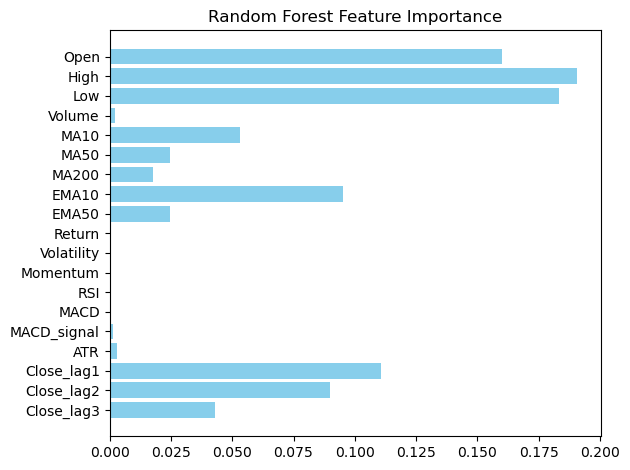

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Random Forest Feature Importance
plt.barh(X_train.columns, rf_model.feature_importances_, color='skyblue')
plt.gca().invert_yaxis()
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()


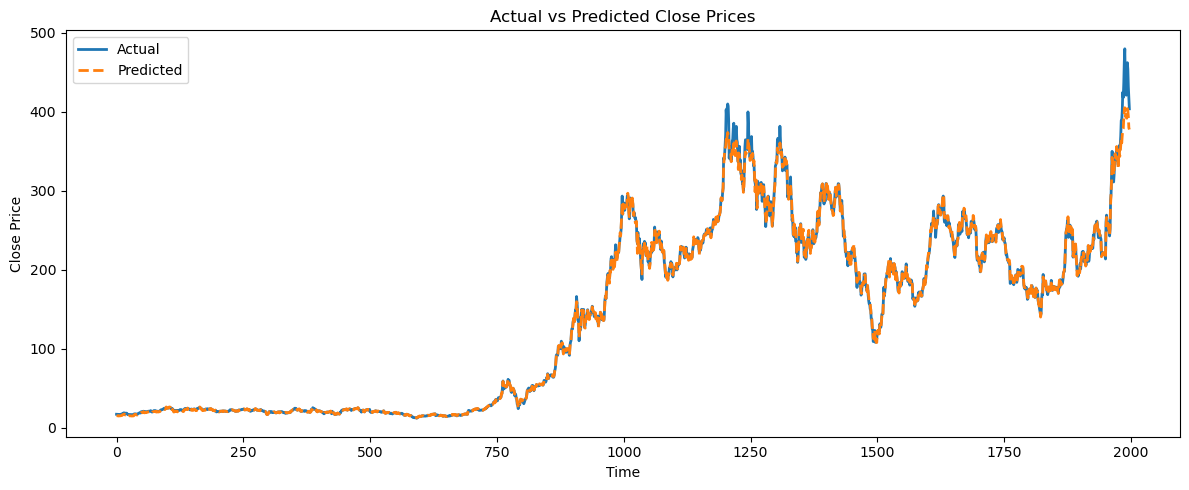

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(y_test.values, label="Actual", linewidth=2)
plt.plot(y_pred, label="Predicted", linewidth=2, linestyle="dashed")
plt.legend()
plt.title("Actual vs Predicted Close Prices")
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.tight_layout()
plt.show()


In [8]:
import numpy as np

# Compute actual and predicted daily returns
actual_direction = np.sign(y_test[1:] - y_test[:-1])      # +1 if up, -1 if down
xgb_direction = np.sign(y_pred_xgb[1:] - y_test[:-1])     # XGBoost prediction direction
rf_direction = np.sign(y_pred_rf[1:] - y_test[:-1])       # Random Forest prediction direction

# Compute directional accuracy
xgb_acc = np.mean(actual_direction == xgb_direction) * 100
rf_acc = np.mean(actual_direction == rf_direction) * 100

print(f"XGBoost Directional Accuracy: {xgb_acc:.2f}%")
print(f"Random Forest Directional Accuracy: {rf_acc:.2f}%")


XGBoost Directional Accuracy: 84.23%
Random Forest Directional Accuracy: 79.52%


________________________________________________________________________________________________________________________________________________________

In [10]:
import joblib

# Load models
models_folder = r"C:\Users\haier\AI_Stock_Analyzer\models"
xgb_model = joblib.load(f"{models_folder}/generalized_xgb_model.pkl")
rf_model = joblib.load(f"{models_folder}/generalized_rf_model.pkl")

# -----------------------------
# Features used by XGBoost
# -----------------------------
print("XGBoost Features:")
if hasattr(xgb_model, "get_booster"):
    booster = xgb_model.get_booster()
    xgb_features = booster.feature_names
    print(xgb_features)
else:
    print("No feature names found in XGBoost model.")

# -----------------------------
# Features used by Random Forest
# -----------------------------
print("\nRandom Forest Features:")
if hasattr(rf_model, "feature_names_in_"):
    rf_features = rf_model.feature_names_in_
    print(list(rf_features))
else:
    print("No feature names found in Random Forest model.")


XGBoost Features:
['Open', 'High', 'Low', 'Volume', 'MA10', 'MA50', 'MA200', 'EMA10', 'EMA50', 'Return', 'Volatility', 'Momentum', 'RSI', 'MACD', 'MACD_signal', 'ATR', 'Close_lag1', 'Close_lag2', 'Close_lag3']

Random Forest Features:
['Open', 'High', 'Low', 'Volume', 'MA10', 'MA50', 'MA200', 'EMA10', 'EMA50', 'Return', 'Volatility', 'Momentum', 'RSI', 'MACD', 'MACD_signal', 'ATR', 'Close_lag1', 'Close_lag2', 'Close_lag3']


In [15]:
import yfinance as yf
import pandas as pd

ticker = "TSLA"
data = yf.download(ticker, period="1y", interval="1d", auto_adjust=False)

print("Columns in data:", data.columns)


[*********************100%***********************]  1 of 1 completed

Columns in data: MultiIndex([('Adj Close', 'TSLA'),
            (    'Close', 'TSLA'),
            (     'High', 'TSLA'),
            (      'Low', 'TSLA'),
            (     'Open', 'TSLA'),
            (   'Volume', 'TSLA')],
           names=['Price', 'Ticker'])


In [16]:
import yfinance as yf
import pandas as pd
import numpy as np
import joblib

# ==============================
# 1. Load trained models
# ==============================
models_folder = r"C:\Users\haier\AI_Stock_Analyzer\models"
xgb_model = joblib.load(f"{models_folder}/generalized_xgb_model.pkl")
rf_model = joblib.load(f"{models_folder}/generalized_rf_model.pkl")

# ==============================
# 2. User input for stock ticker
# ==============================
ticker = input("Enter stock ticker: ").upper()

# Download data without auto-adjust
data = yf.download(ticker, period="1y", interval="1d", auto_adjust=False)

if data.empty:
    raise ValueError(f"No data found for ticker: {ticker}")

# ==============================
# 3. Flatten MultiIndex columns if any
# ==============================
df = data.copy()

if isinstance(df.columns, pd.MultiIndex):
    df.columns = [col[0].strip() for col in df.columns]  # take first level (Price)

# Ensure all columns are strings
df.columns = [str(col).strip() for col in df.columns]

# Ensure we have 'Close' column
if 'Close' not in df.columns:
    if 'Adj Close' in df.columns:
        df['Close'] = df['Adj Close']
    else:
        raise ValueError("No Close or Adj Close column found for this ticker")

# ==============================
# 4. Feature engineering (all 19 features)
# ==============================
df['MA10'] = df['Close'].rolling(10).mean()
df['MA50'] = df['Close'].rolling(50).mean()
df['MA200'] = df['Close'].rolling(200).mean()
df['EMA10'] = df['Close'].ewm(span=10, adjust=False).mean()
df['EMA50'] = df['Close'].ewm(span=50, adjust=False).mean()
df['Return'] = df['Close'].pct_change()
df['Volatility'] = df['Return'].rolling(10).std()
df['Momentum'] = df['Close'] - df['Close'].shift(10)
df['RSI'] = 100 - (100 / (1 + df['Return'].rolling(14).mean() / df['Return'].rolling(14).std()))
df['MACD'] = df['EMA10'] - df['EMA50']
df['MACD_signal'] = df['MACD'].ewm(span=9, adjust=False).mean()
df['ATR'] = df['High'] - df['Low']
df['Close_lag1'] = df['Close'].shift(1)
df['Close_lag2'] = df['Close'].shift(2)
df['Close_lag3'] = df['Close'].shift(3)

df = df.dropna()

# ==============================
# 5. Prepare features in exact order
# ==============================
features = ['Open', 'High', 'Low', 'Volume', 'MA10', 'MA50', 'MA200',
            'EMA10', 'EMA50', 'Return', 'Volatility', 'Momentum', 'RSI',
            'MACD', 'MACD_signal', 'ATR', 'Close_lag1', 'Close_lag2', 'Close_lag3']

X = df[features]
X_last = X.iloc[[-1]]

# ==============================
# 6. Predict with both models
# ==============================
pred_xgb = xgb_model.predict(X_last)[0]
pred_rf = rf_model.predict(X_last)[0]

pred_avg = (pred_xgb + pred_rf) / 2

# ==============================
# 7. Generate trading signal
# ==============================
last_close = df['Close'].iloc[-1]

if pred_avg > last_close * 1.01:
    signal = "Buy"
elif pred_avg < last_close * 0.99:
    signal = "Sell"
else:
    signal = "Neutral"

confidence = 100 - abs(pred_xgb - pred_rf)/last_close * 100

# ==============================
# 8. Display results
# ==============================
print(f"\nTicker: {ticker}")
print(f"Last Close Price: {last_close:.2f}")
print(f"Predicted Next Close: {pred_avg:.2f}")
print(f"Trading Signal: {signal}")
print(f"Prediction Confidence: {confidence:.2f}%")


Enter stock ticker:  TSLA


[*********************100%***********************]  1 of 1 completed



Ticker: TSLA
Last Close Price: 395.94
Predicted Next Close: 374.55
Trading Signal: Sell
Prediction Confidence: 97.02%


In [21]:
import yfinance as yf
import pandas as pd
import numpy as np
import joblib

# ==============================
# 1. Load trained models
# ==============================
models_folder = r"C:\Users\haier\AI_Stock_Analyzer\models"
xgb_model = joblib.load(f"{models_folder}/generalized_xgb_model.pkl")
rf_model = joblib.load(f"{models_folder}/generalized_rf_model.pkl")

# ==============================
# 2. User input for stock ticker
# ==============================
ticker = input("Enter stock ticker: ").upper()

# Download data without auto-adjust
data = yf.download(ticker, period="1y", interval="1d", auto_adjust=False)

if data.empty:
    raise ValueError(f"No data found for ticker: {ticker}")

# ==============================
# 3. Flatten MultiIndex columns if any
# ==============================
df = data.copy()

if isinstance(df.columns, pd.MultiIndex):
    df.columns = [col[0].strip() for col in df.columns]  # take first level (Price)

# Ensure all columns are strings
df.columns = [str(col).strip() for col in df.columns]

# Ensure we have 'Close' column
if 'Close' not in df.columns:
    if 'Adj Close' in df.columns:
        df['Close'] = df['Adj Close']
    else:
        raise ValueError("No Close or Adj Close column found for this ticker")

# ==============================
# 4. Feature engineering (all 19 features)
# ==============================
df['MA10'] = df['Close'].rolling(10).mean()
df['MA50'] = df['Close'].rolling(50).mean()
df['MA200'] = df['Close'].rolling(200).mean()
df['EMA10'] = df['Close'].ewm(span=10, adjust=False).mean()
df['EMA50'] = df['Close'].ewm(span=50, adjust=False).mean()
df['Return'] = df['Close'].pct_change()
df['Volatility'] = df['Return'].rolling(10).std()
df['Momentum'] = df['Close'] - df['Close'].shift(10)
df['RSI'] = 100 - (100 / (1 + df['Return'].rolling(14).mean() / df['Return'].rolling(14).std()))
df['MACD'] = df['EMA10'] - df['EMA50']
df['MACD_signal'] = df['MACD'].ewm(span=9, adjust=False).mean()
df['ATR'] = df['High'] - df['Low']
df['Close_lag1'] = df['Close'].shift(1)
df['Close_lag2'] = df['Close'].shift(2)
df['Close_lag3'] = df['Close'].shift(3)

df = df.dropna()

# ==============================
# 5. Prepare features in exact order
# ==============================
features = ['Open', 'High', 'Low', 'Volume', 'MA10', 'MA50', 'MA200',
            'EMA10', 'EMA50', 'Return', 'Volatility', 'Momentum', 'RSI',
            'MACD', 'MACD_signal', 'ATR', 'Close_lag1', 'Close_lag2', 'Close_lag3']

X = df[features]
X_last = X.iloc[[-1]]

# ==============================
# 6. Predict with both models
# ==============================
pred_xgb = xgb_model.predict(X_last)[0]
pred_rf = rf_model.predict(X_last)[0]

pred_avg = (pred_xgb + pred_rf) / 2

# ==============================
# 7. Generate trading signal
# ==============================
last_close = df['Close'].iloc[-1]

if pred_avg > last_close * 1.01:
    signal = "Buy"
elif pred_avg < last_close * 0.99:
    signal = "Sell"
else:
    signal = "Neutral"

# Confidence based on model agreement
confidence = 100 - abs(pred_xgb - pred_rf)/last_close * 100

# ==============================
# 8. Display results
# ==============================
print(f"\nTicker: {ticker}")
print(f"Last Close Price: {last_close:.2f}")
print(f"Predicted Next Close: {pred_avg:.2f}")
print(f"Trading Signal: {signal}")
print(f"Prediction Confidence: {confidence:.2f}%")


Enter stock ticker:  aapl


[*********************100%***********************]  1 of 1 completed



Ticker: AAPL
Last Close Price: 234.07
Predicted Next Close: 231.22
Trading Signal: Sell
Prediction Confidence: 99.74%


In [22]:
import yfinance as yf
import pandas as pd
import numpy as np
import joblib

# ==============================
# 1. Load trained models
# ==============================
models_folder = r"C:\Users\haier\AI_Stock_Analyzer\models"
xgb_model = joblib.load(f"{models_folder}/generalized_xgb_model.pkl")
rf_model = joblib.load(f"{models_folder}/generalized_rf_model.pkl")

# ==============================
# 2. User input for stock ticker
# ==============================
ticker = input("Enter stock ticker: ").upper()

# Download data without auto-adjust
data = yf.download(ticker, period="1y", interval="1d", auto_adjust=False)

if data.empty:
    raise ValueError(f"No data found for ticker: {ticker}")

# ==============================
# 3. Flatten MultiIndex columns if any
# ==============================
df = data.copy()

if isinstance(df.columns, pd.MultiIndex):
    df.columns = [col[0].strip() for col in df.columns]  # take first level (Price)

# Ensure all columns are strings
df.columns = [str(col).strip() for col in df.columns]

# Ensure we have 'Close' column
if 'Close' not in df.columns:
    if 'Adj Close' in df.columns:
        df['Close'] = df['Adj Close']
    else:
        raise ValueError("No Close or Adj Close column found for this ticker")

# ==============================
# 4. Feature engineering (all 19 features)
# ==============================
df['MA10'] = df['Close'].rolling(10).mean()
df['MA50'] = df['Close'].rolling(50).mean()
df['MA200'] = df['Close'].rolling(200).mean()
df['EMA10'] = df['Close'].ewm(span=10, adjust=False).mean()
df['EMA50'] = df['Close'].ewm(span=50, adjust=False).mean()
df['Return'] = df['Close'].pct_change()
df['Volatility'] = df['Return'].rolling(10).std()
df['Momentum'] = df['Close'] - df['Close'].shift(10)
df['RSI'] = 100 - (100 / (1 + df['Return'].rolling(14).mean() / df['Return'].rolling(14).std()))
df['MACD'] = df['EMA10'] - df['EMA50']
df['MACD_signal'] = df['MACD'].ewm(span=9, adjust=False).mean()
df['ATR'] = df['High'] - df['Low']
df['Close_lag1'] = df['Close'].shift(1)
df['Close_lag2'] = df['Close'].shift(2)
df['Close_lag3'] = df['Close'].shift(3)

df = df.dropna()

# ==============================
# 5. Prepare features in exact order
# ==============================
features = ['Open', 'High', 'Low', 'Volume', 'MA10', 'MA50', 'MA200',
            'EMA10', 'EMA50', 'Return', 'Volatility', 'Momentum', 'RSI',
            'MACD', 'MACD_signal', 'ATR', 'Close_lag1', 'Close_lag2', 'Close_lag3']

X = df[features]
X_last = X.iloc[[-1]]

# ==============================
# 6. Predict with both models
# ==============================
pred_xgb = xgb_model.predict(X_last)[0]
pred_rf = rf_model.predict(X_last)[0]

pred_avg = (pred_xgb + pred_rf) / 2

# ==============================
# 7. Generate trading signal
# ==============================
last_close = df['Close'].iloc[-1]

if pred_avg > last_close * 1.01:
    signal = "Buy"
elif pred_avg < last_close * 0.99:
    signal = "Sell"
else:
    signal = "Neutral"

confidence = 100 - abs(pred_xgb - pred_rf)/last_close * 100

# ==============================
# 8. Display results
# ==============================
print(f"\nTicker: {ticker}")
print(f"Last Close Price: {last_close:.2f}")
print(f"Predicted Next Close: {pred_avg:.2f}")
print(f"Trading Signal: {signal}")
print(f"Prediction Confidence: {confidence:.2f}%")



Enter stock ticker:  msft


[*********************100%***********************]  1 of 1 completed



Ticker: MSFT
Last Close Price: 509.90
Predicted Next Close: 449.95
Trading Signal: Sell
Prediction Confidence: 99.20%


In [23]:
import yfinance as yf
import pandas as pd
import numpy as np
import joblib

# ==============================
# 1. Load trained models
# ==============================
models_folder = r"C:\Users\haier\AI_Stock_Analyzer\models"
xgb_model = joblib.load(f"{models_folder}/generalized_xgb_model.pkl")
rf_model = joblib.load(f"{models_folder}/generalized_rf_model.pkl")

# ==============================
# 2. User input for stock ticker
# ==============================
ticker = input("Enter stock ticker: ").upper()

# Download data without auto-adjust
data = yf.download(ticker, period="1y", interval="1d", auto_adjust=False)

if data.empty:
    raise ValueError(f"No data found for ticker: {ticker}")

# ==============================
# 3. Flatten MultiIndex columns if any
# ==============================
df = data.copy()

if isinstance(df.columns, pd.MultiIndex):
    df.columns = [col[0].strip() for col in df.columns]  # take first level (Price)

# Ensure all columns are strings
df.columns = [str(col).strip() for col in df.columns]

# Ensure we have 'Close' column
if 'Close' not in df.columns:
    if 'Adj Close' in df.columns:
        df['Close'] = df['Adj Close']
    else:
        raise ValueError("No Close or Adj Close column found for this ticker")

# ==============================
# 4. Feature engineering (all 19 features)
# ==============================
df['MA10'] = df['Close'].rolling(10).mean()
df['MA50'] = df['Close'].rolling(50).mean()
df['MA200'] = df['Close'].rolling(200).mean()
df['EMA10'] = df['Close'].ewm(span=10, adjust=False).mean()
df['EMA50'] = df['Close'].ewm(span=50, adjust=False).mean()
df['Return'] = df['Close'].pct_change()
df['Volatility'] = df['Return'].rolling(10).std()
df['Momentum'] = df['Close'] - df['Close'].shift(10)
df['RSI'] = 100 - (100 / (1 + df['Return'].rolling(14).mean() / df['Return'].rolling(14).std()))
df['MACD'] = df['EMA10'] - df['EMA50']
df['MACD_signal'] = df['MACD'].ewm(span=9, adjust=False).mean()
df['ATR'] = df['High'] - df['Low']
df['Close_lag1'] = df['Close'].shift(1)
df['Close_lag2'] = df['Close'].shift(2)
df['Close_lag3'] = df['Close'].shift(3)

df = df.dropna()

# ==============================
# 5. Prepare features in exact order
# ==============================
features = ['Open', 'High', 'Low', 'Volume', 'MA10', 'MA50', 'MA200',
            'EMA10', 'EMA50', 'Return', 'Volatility', 'Momentum', 'RSI',
            'MACD', 'MACD_signal', 'ATR', 'Close_lag1', 'Close_lag2', 'Close_lag3']

X = df[features]
X_last = X.iloc[[-1]]

# ==============================
# 6. Predict with both models
# ==============================
pred_xgb = xgb_model.predict(X_last)[0]
pred_rf = rf_model.predict(X_last)[0]

pred_avg = (pred_xgb + pred_rf) / 2

# ==============================
# 7. Generate trading signal
# ==============================
last_close = df['Close'].iloc[-1]

if pred_avg > last_close * 1.01:
    signal = "Buy"
elif pred_avg < last_close * 0.99:
    signal = "Sell"
else:
    signal = "Neutral"

confidence = 100 - abs(pred_xgb - pred_rf)/last_close * 100

# ==============================
# 8. Display results
# ==============================
print(f"\nTicker: {ticker}")
print(f"Last Close Price: {last_close:.2f}")
print(f"Predicted Next Close: {pred_avg:.2f}")
print(f"Trading Signal: {signal}")
print(f"Prediction Confidence: {confidence:.2f}%")



Enter stock ticker:  amzn


[*********************100%***********************]  1 of 1 completed



Ticker: AMZN
Last Close Price: 228.15
Predicted Next Close: 228.19
Trading Signal: Neutral
Prediction Confidence: 99.62%


In [26]:
import yfinance as yf
import pandas as pd
import numpy as np
import joblib

# ==============================
# 1. Load trained models
# ==============================
models_folder = r"C:\Users\haier\AI_Stock_Analyzer\models"
xgb_model = joblib.load(f"{models_folder}/generalized_xgb_model.pkl")
rf_model = joblib.load(f"{models_folder}/generalized_rf_model.pkl")

# ==============================
# 2. User input for stock ticker
# ==============================
ticker = input("Enter stock ticker: ").upper()

# Download data without auto-adjust
data = yf.download(ticker, period="1y", interval="1d", auto_adjust=False)

if data.empty:
    raise ValueError(f"No data found for ticker: {ticker}")

# ==============================
# 3. Flatten MultiIndex columns if any
# ==============================
df = data.copy()

if isinstance(df.columns, pd.MultiIndex):
    df.columns = [col[0].strip() for col in df.columns]  # take first level (Price)

# Ensure all columns are strings
df.columns = [str(col).strip() for col in df.columns]

# Ensure we have 'Close' column
if 'Close' not in df.columns:
    if 'Adj Close' in df.columns:
        df['Close'] = df['Adj Close']
    else:
        raise ValueError("No Close or Adj Close column found for this ticker")

# ==============================
# 4. Feature engineering (all 19 features)
# ==============================
df['MA10'] = df['Close'].rolling(10).mean()
df['MA50'] = df['Close'].rolling(50).mean()
df['MA200'] = df['Close'].rolling(200).mean()
df['EMA10'] = df['Close'].ewm(span=10, adjust=False).mean()
df['EMA50'] = df['Close'].ewm(span=50, adjust=False).mean()
df['Return'] = df['Close'].pct_change()
df['Volatility'] = df['Return'].rolling(10).std()
df['Momentum'] = df['Close'] - df['Close'].shift(10)
df['RSI'] = 100 - (100 / (1 + df['Return'].rolling(14).mean() / df['Return'].rolling(14).std()))
df['MACD'] = df['EMA10'] - df['EMA50']
df['MACD_signal'] = df['MACD'].ewm(span=9, adjust=False).mean()
df['ATR'] = df['High'] - df['Low']
df['Close_lag1'] = df['Close'].shift(1)
df['Close_lag2'] = df['Close'].shift(2)
df['Close_lag3'] = df['Close'].shift(3)

df = df.dropna()

# ==============================
# 5. Prepare features in exact order
# ==============================
features = ['Open', 'High', 'Low', 'Volume', 'MA10', 'MA50', 'MA200',
            'EMA10', 'EMA50', 'Return', 'Volatility', 'Momentum', 'RSI',
            'MACD', 'MACD_signal', 'ATR', 'Close_lag1', 'Close_lag2', 'Close_lag3']

X = df[features]
X_last = X.iloc[[-1]]

# ==============================
# 6. Predict with both models
# ==============================
pred_xgb = xgb_model.predict(X_last)[0]
pred_rf = rf_model.predict(X_last)[0]

pred_avg = (pred_xgb + pred_rf) / 2

# ==============================
# 7. Generate trading signal
# ==============================
last_close = df['Close'].iloc[-1]

if pred_avg > last_close * 1.01:
    signal = "Buy"
elif pred_avg < last_close * 0.99:
    signal = "Sell"
else:
    signal = "Neutral"

confidence = 100 - abs(pred_xgb - pred_rf)/last_close * 100

# ==============================
# 8. Display results
# ==============================
print(f"\nTicker: {ticker}")
print(f"Last Close Price: {last_close:.2f}")
print(f"Predicted Next Close: {pred_avg:.2f}")
print(f"Trading Signal: {signal}")
print(f"Prediction Confidence: {confidence:.2f}%")



Enter stock ticker:  googl


[*********************100%***********************]  1 of 1 completed



Ticker: GOOGL
Last Close Price: 240.80
Predicted Next Close: 239.92
Trading Signal: Neutral
Prediction Confidence: 99.08%
